In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv("data/cleaned_data/hyderabad/hyd_properties_cleaned.csv")
df.head(3)

,property_type,bhk,area,society_name,locality,city,price_in_crore,price_per_sqft,status,new_resale,price_negotiable,age_of_property,bathrooms,carpet_area,floor,booking_amount,balconies,additional_rooms,security_deposit,furnishing_type,facing,overlooking,ownership_type,amenities,furnish_details
0,Apartment,2,1120.00,NaN,Asmangarh,Hyderabad,0.58,5178.00,Ready to move,Resale,Yes,Old Property,2.00,NaN,4.00,500000.00,1.00,pooja room,No Deposit,Semi-Furnished,North,Road View,Freehold,"Landscaped Gardens, Lift(s), Swimming Pool, Gy...",Sofa
1,Apartment,3,1905.00,Asbl Asbl Spire,Kokapet,Hyderabad,1.39,7349.00,Under Construction,New,Yes,Unknown,3.00,NaN,9.00,NaN,NaN,NaN,No Deposit,Unfurnished,NaN,NaN,Freehold,NaN,NaN
2,Independent House,10,14400.00,NaN,Banjara Hills,Hyderabad,17.47,12131.00,Ready to move,Resale,No,Unknown,11.00,14400.00,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,North,NaN,NaN,NaN,NaN


In [4]:
df.shape

(19510, 25)

#### Check for duplicate values

In [5]:
df.duplicated().sum()

np.int64(5595)

In [6]:
df1 = df.drop_duplicates()
df1.duplicated().sum()

np.int64(0)

- Shape of df after dropping duplicate values

In [7]:
df1.shape

(13915, 25)

In [8]:
df1.columns

Index(['property_type', 'bhk', 'area', 'society_name', 'locality', 'city',
       'price_in_crore', 'price_per_sqft', 'status', 'new_resale',
       'price_negotiable', 'age_of_property', 'bathrooms', 'carpet_area',
       'floor', 'booking_amount', 'balconies', 'additional_rooms',
       'security_deposit', 'furnishing_type', 'facing', 'overlooking',
       'ownership_type', 'amenities', 'furnish_details'],
      dtype='object')

<h2 align="center" style="color:blue">Exploratory Data Analysis</h2>

In [9]:
df1.describe()

,bhk,area,price_in_crore,price_per_sqft,bathrooms,carpet_area,floor,booking_amount,balconies
count,13915.00,13915.00,13831.00,13831.00,12160.00,6257.00,3018.00,3577.00,2861.00
mean,2.85,1973.60,1.58,7034.48,2.77,2080.04,5.61,494552.72,1.42
std,0.94,1208.92,2.19,4563.40,1.01,28078.68,6.14,558965.08,0.67
min,1.00,200.00,0.09,787.00,1.00,20.00,0.00,1.00,1.00
25%,2.00,1215.00,0.67,4998.00,2.00,1000.00,2.00,200000.00,1.00
50%,3.00,1600.00,0.95,6185.00,3.00,1300.00,4.00,500000.00,1.00
75%,3.00,2215.00,1.61,7621.00,3.00,1850.00,7.00,500000.00,2.00
max,12.00,15825.00,50.00,135135.00,12.00,2200165.00,48.00,12000000.00,6.00


In [64]:
numeric_columns = ['bhk', 'area', 'price_per_sqft', 'bathrooms',
       'carpet_area', 'floor', 'booking_amount', 'balconies']
numeric_columns

['bhk',
 'area',
 'price_per_sqft',
 'bathrooms',
 'carpet_area',
 'floor',
 'booking_amount',
 'balconies']

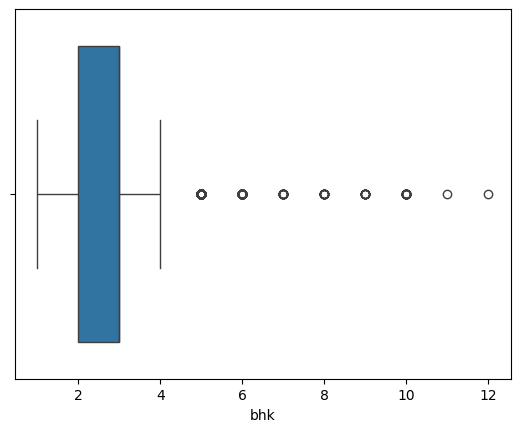

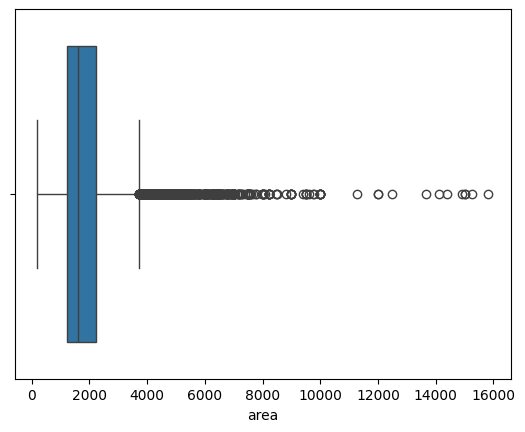

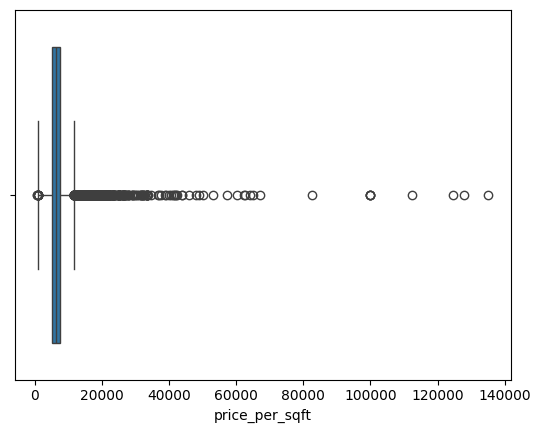

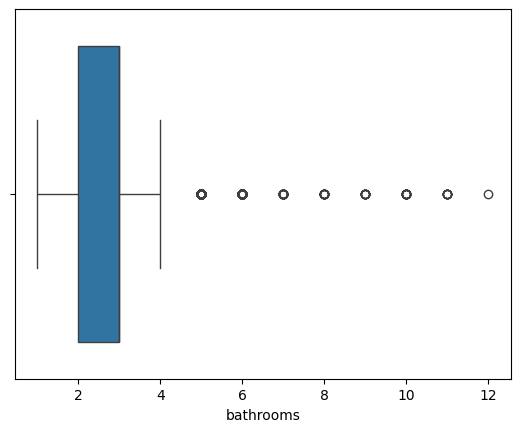

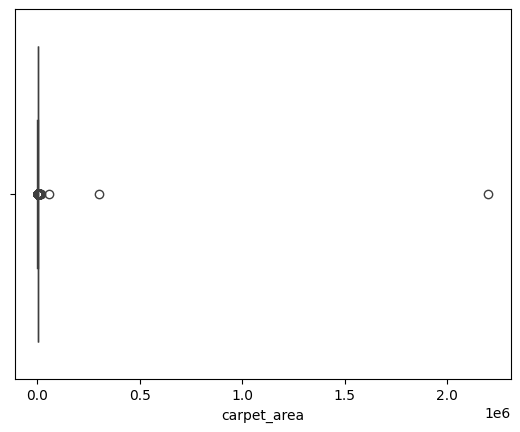

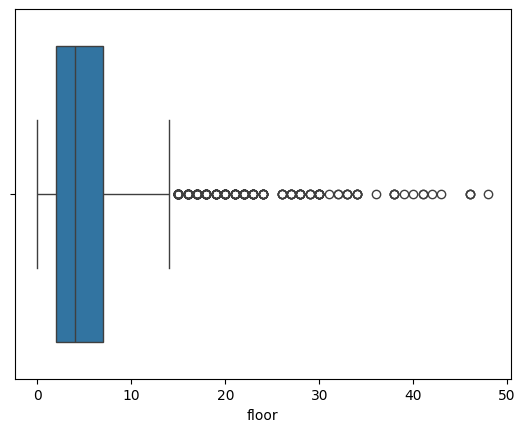

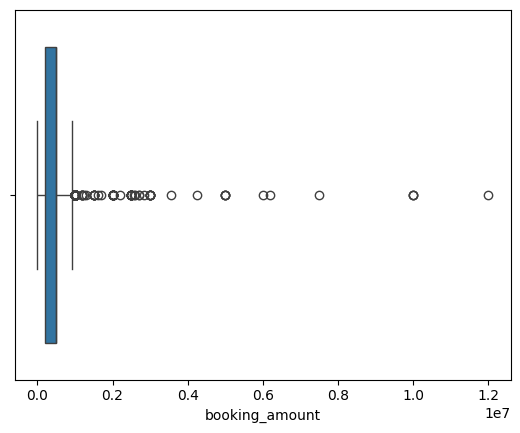

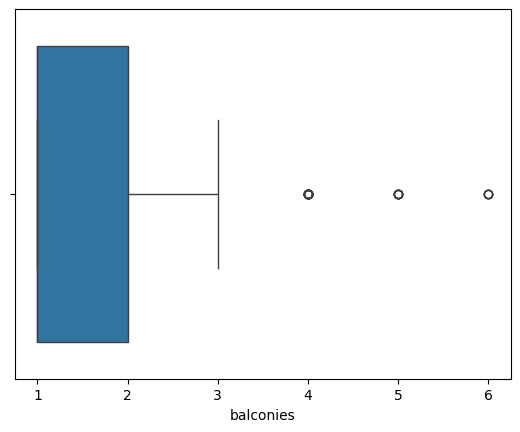

In [65]:
for col in numeric_columns:
    sns.boxplot(x=df1[col])
    plt.show()

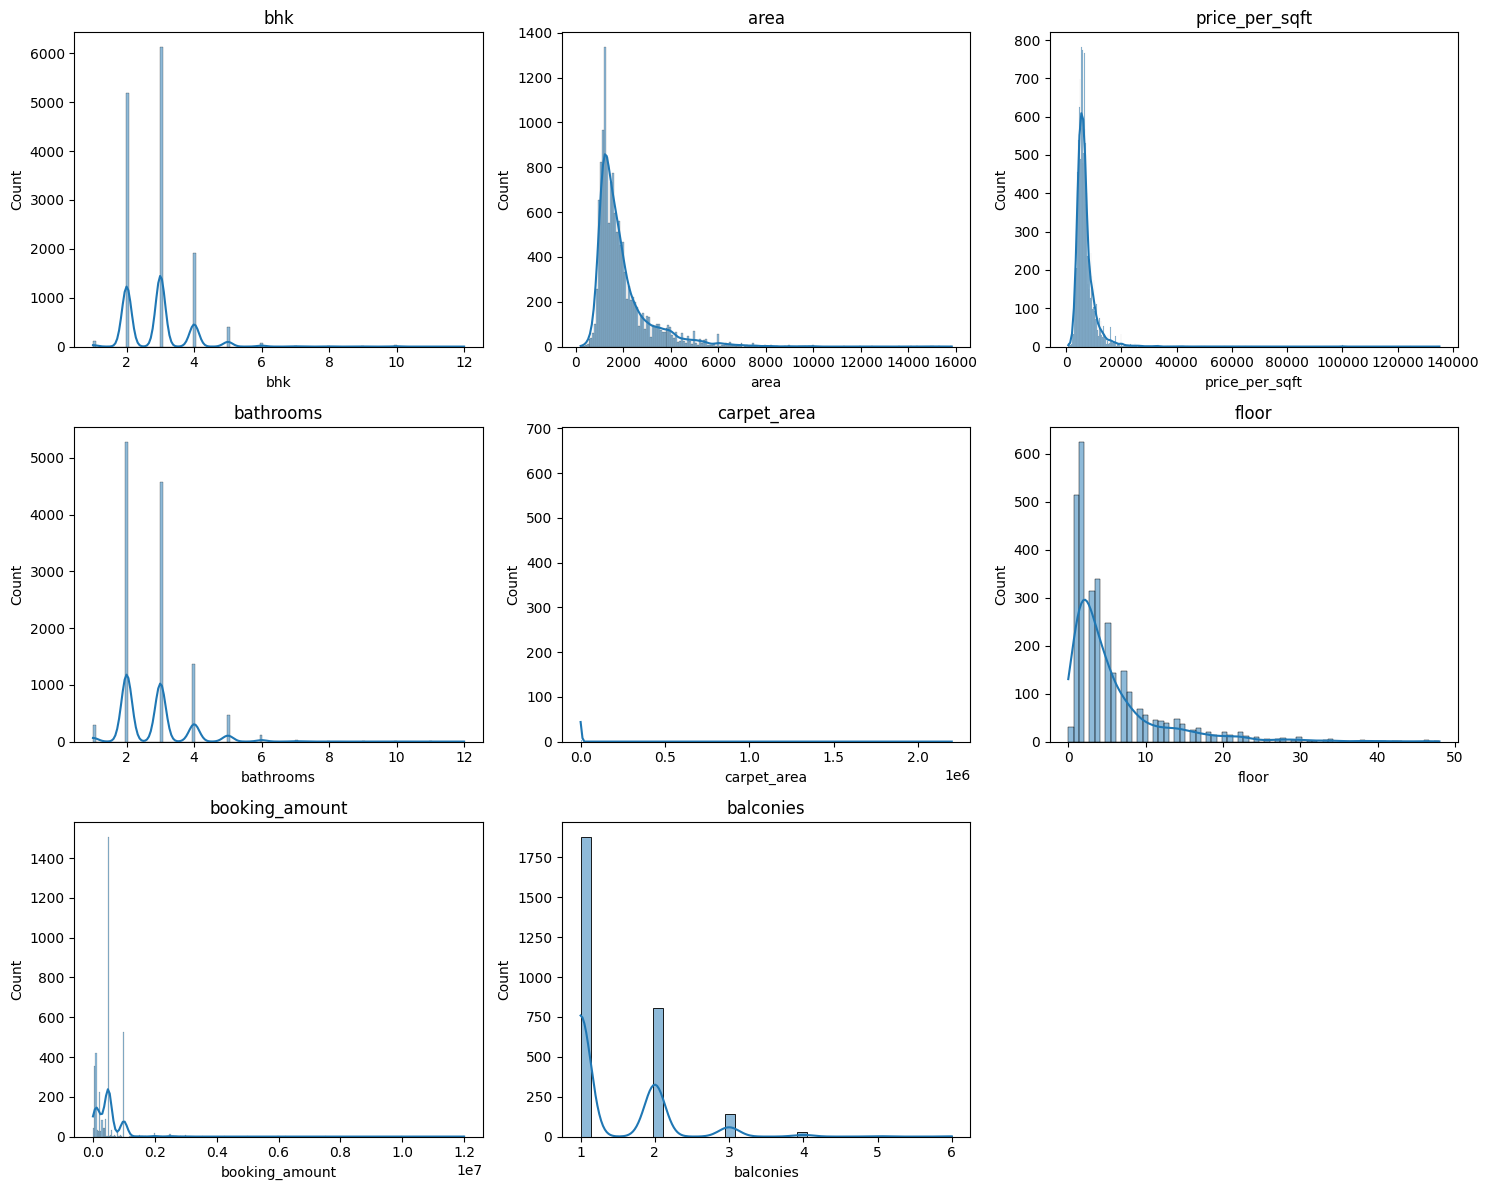

In [66]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

axs = axs.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(df1[column], kde=True, ax=axs[i])
    axs[i].set_title(column)

for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

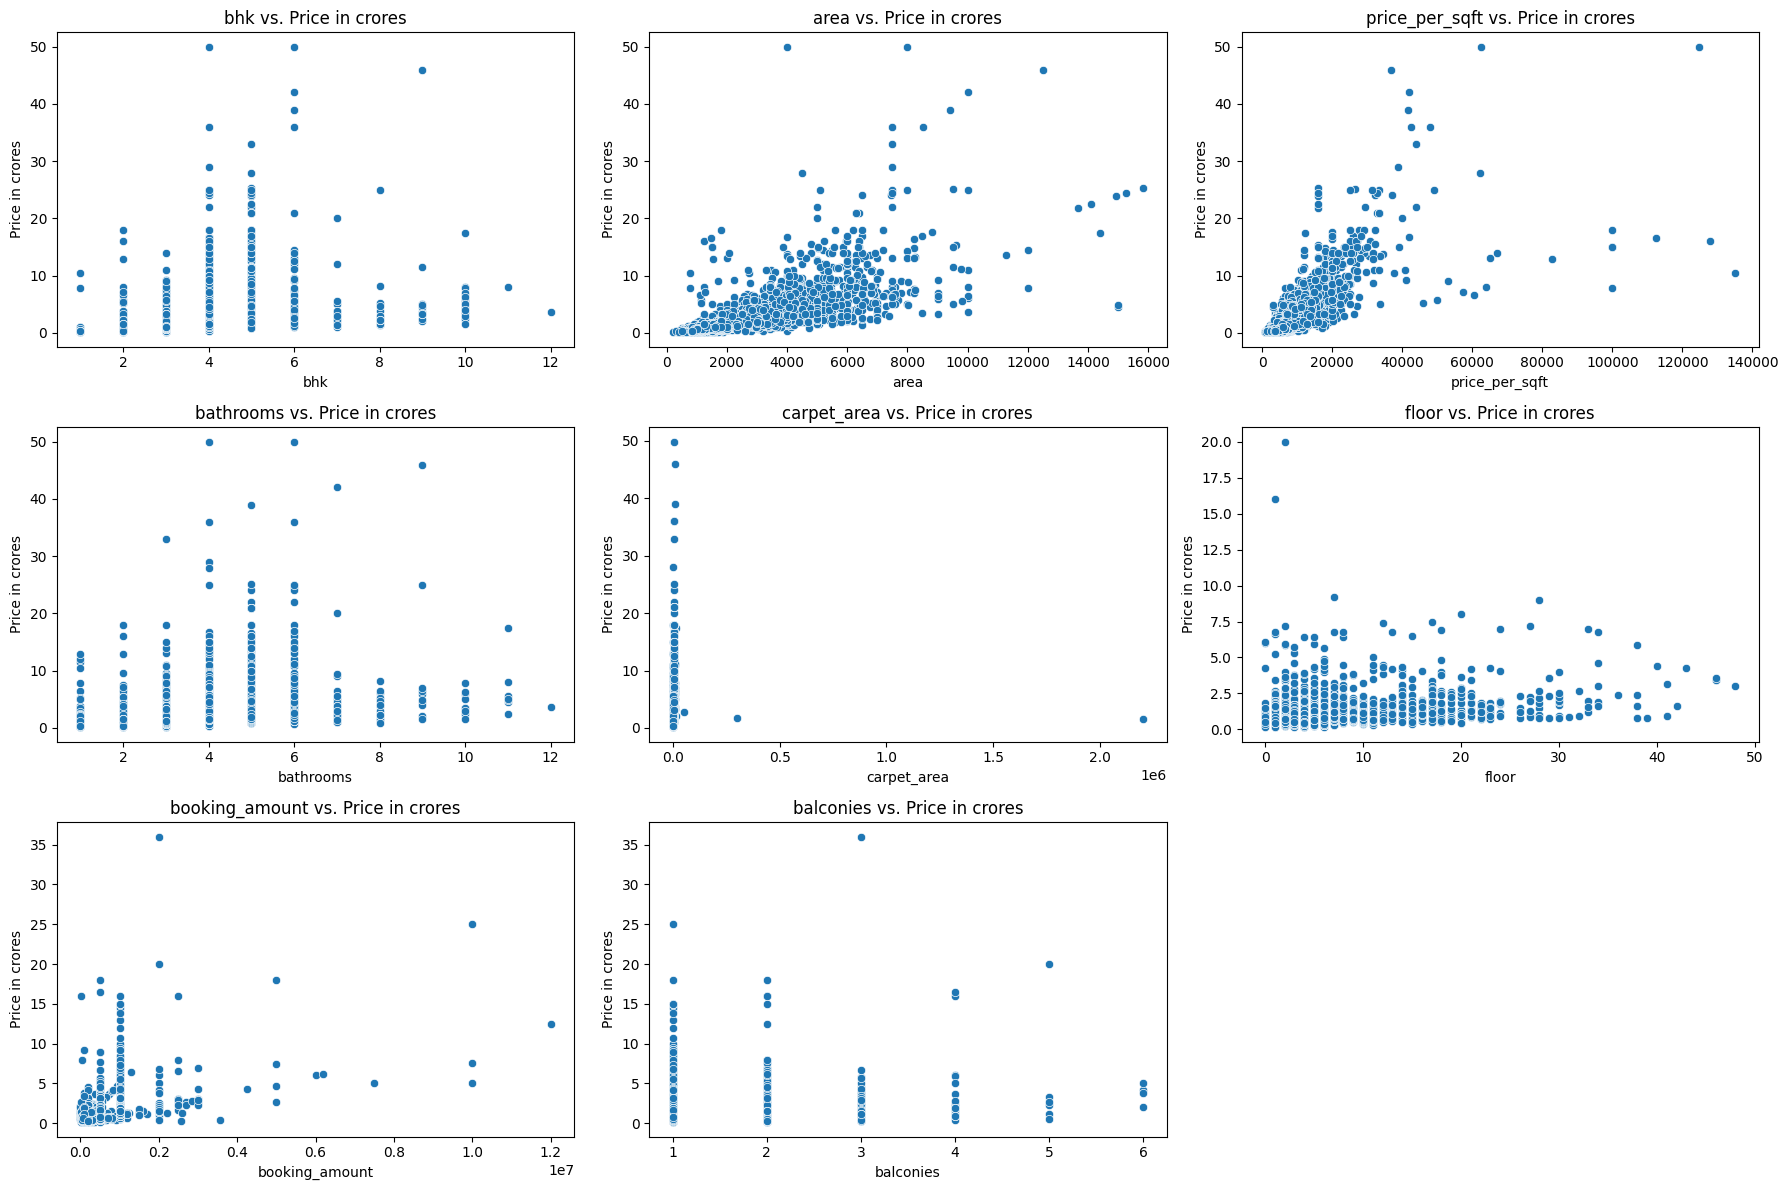

In [72]:
import math

n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))

axes = axes.flatten()

for i, (ax, column) in enumerate(zip(axes, numeric_columns)):
    sns.scatterplot(x=df1[column], y=df1['price_in_crore'], ax=ax)
    ax.set_title(f"{column} vs. Price in crores")
    ax.set_xlabel(column)
    ax.set_ylabel('Price in crores')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
categorical_cols = ['property_type', 'society_name', 'locality']

In [73]:
df1.head(2)

,property_type,bhk,area,society_name,locality,city,price_in_crore,price_per_sqft,status,new_resale,price_negotiable,age_of_property,bathrooms,carpet_area,floor,booking_amount,balconies,additional_rooms,security_deposit,furnishing_type,facing,overlooking,ownership_type,amenities,furnish_details
0,Apartment,2,1120.00,NaN,Asmangarh,Hyderabad,0.58,5178.00,Ready to move,Resale,Yes,Old Property,2.00,NaN,4.00,500000.00,1.00,pooja room,No Deposit,Semi-Furnished,North,Road View,Freehold,"Landscaped Gardens, Lift(s), Swimming Pool, Gy...",Sofa
1,Apartment,3,1905.00,Asbl Asbl Spire,Kokapet,Hyderabad,1.39,7349.00,Under Construction,New,Yes,Unknown,3.00,NaN,9.00,NaN,NaN,NaN,No Deposit,Unfurnished,NaN,NaN,Freehold,NaN,NaN


In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18,18))
axes = axes.flatten()

for ax, column in zip(axes, categorical_cols):
    category_counts = df2[column].value_counts(normalize=True) * 100

    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f"Percentage Distribution of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Percentage of Policyholders (%)")
    ax.tick_params(axis='x', rotation=45, labelsize=10)

plt.tight_layout()
plt.show()

#### outliers based on area column

<Axes: xlabel='area', ylabel='Count'>

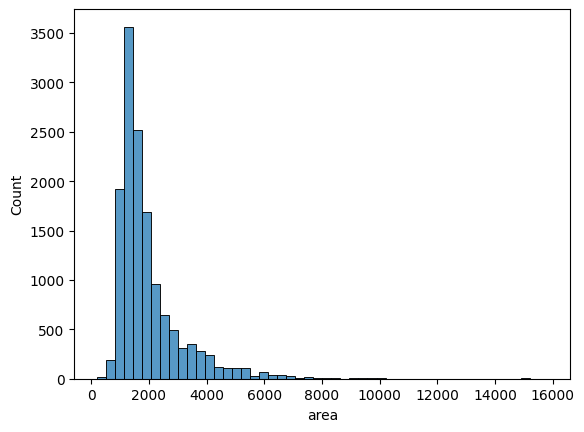

In [10]:
sns.histplot(df1['area'], bins=50)

<Axes: ylabel='area'>

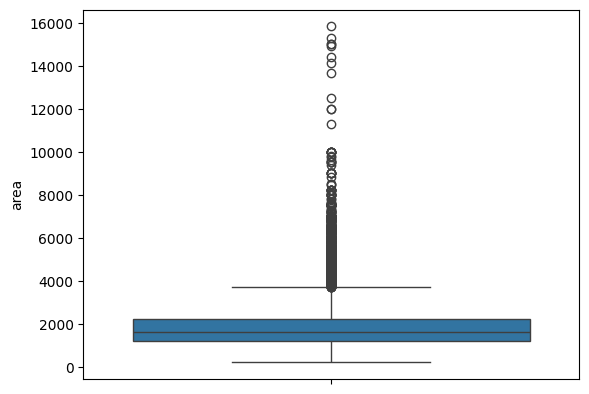

In [11]:
sns.boxplot(df1['area'])

##### Using IQR Method

In [12]:
# Calculate the IQR based on the 'price_in_crore' column
Q1 = df1['area'].quantile(0.25)
Q3 = df1['area'].quantile(0.75)

IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(-285.0), np.float64(3715.0))

In [13]:
# Identify outliers
area_outliers = df1[(df1['area'] < lower_bound) | (df1['area'] > upper_bound)]

num_outliers = area_outliers.shape[0]
outliers_area_stats = area_outliers['area'].describe()

print(num_outliers)
outliers_area_stats

1185


count    1185.00
mean     5058.26
std      1505.36
min      3716.00
25%      4013.00
50%      4600.00
75%      5500.00
max     15825.00
Name: area, dtype: float64

In [14]:
area_outliers[['locality','area','bhk','price_in_crore','price_per_sqft']].sort_values('area',ascending=False).sample(20)

,locality,area,bhk,price_in_crore,price_per_sqft
2977,Nanakramguda,5200.00,4,6.20,11923.00
799,Begumpet,4019.00,4,4.62,11500.00
15093,Kollur,3940.00,4,2.70,6852.00
4060,Tellapur,3942.00,4,2.91,7400.00
16995,Kismatpur,4050.00,4,3.45,8500.00
4926,Kokapet,4200.00,4,11.00,26190.00
16956,Shaikpet,4021.00,5,8.00,19895.00
2107,Maheshwaram,3789.00,4,3.27,8655.00
225,Banjara Hills,4200.00,4,6.72,16000.00
18278,Film Nagar,5500.00,5,14.00,25454.00


- There are 1,185 outliers in the area column using the IQR method and the data points to be legitimate (i.e., they represent actual properties and not data entry errors).
- The fact that these outliers are legitimate suggests that there is a wide range of property sizes in the dataset.
- This real estate market may cater to both high-end buyers (seeking large properties) and budget-conscious buyers (seeking smaller properties).

Normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [15]:
print(df1[(df1['area'] / df1['bhk']) < 300].shape)
df1[(df1['area'] / df1['bhk']) < 300]

(37, 25)


,property_type,bhk,area,society_name,locality,city,price_in_crore,price_per_sqft,status,new_resale,price_negotiable,age_of_property,bathrooms,carpet_area,floor,booking_amount,balconies,additional_rooms,security_deposit,furnishing_type,facing,overlooking,ownership_type,amenities,furnish_details
1513,Independent House,4,1050.00,NaN,Beeramguda,Hyderabad,1.10,10476.00,Ready to move,New,Yes,New Property,5.00,NaN,NaN,50000.00,1.00,pooja room,No Deposit,Unfurnished,North,NaN,Freehold,NaN,NaN
1718,Independent House,2,540.00,NaN,Golnaka,Hyderabad,0.42,7777.00,Ready to move,Resale,Yes,Moderately New Property,2.00,495.00,NaN,100000.00,2.00,study room,No Deposit,Unfurnished,East,NaN,Freehold,NaN,NaN
2030,Independent House,3,675.00,NaN,Katedan Industrial Area,Hyderabad,0.67,9925.00,Ready to move,Resale,No,New Property,2.00,NaN,NaN,NaN,NaN,NaN,No Deposit,Unfurnished,NaN,NaN,NaN,NaN,NaN
2056,Independent House,4,1170.00,NaN,Sitaphalmandi,Hyderabad,0.90,7692.00,Ready to move,Resale,Yes,Old Property,4.00,1080.00,NaN,100000.00,2.00,study room,No Deposit,Unfurnished,West,NaN,Freehold,NaN,NaN
2660,Independent House,4,1076.00,NaN,Nacharam,Hyderabad,0.65,6040.00,Ready to move,Resale,Yes,Moderately New Property,3.00,969.00,NaN,500000.00,2.00,NaN,No Deposit,Unfurnished,East,NaN,Freehold,NaN,NaN
3245,Apartment,3,843.00,Vs Bliss,Manikonda,Hyderabad,0.64,7542.00,Under Construction,New,Yes,Unknown,3.00,NaN,NaN,56000.00,NaN,NaN,No Deposit,Unfurnished,NaN,"Corner, Garden View, Pool View, Road View",Leasehol,"Car Parking, 24 X 7 Security, Full Power Backu...","Gas connection, Dining Table, Wifi, Washing Ma..."
3746,Independent House,3,864.00,NaN,Katedan Industrial Area,Hyderabad,0.88,10185.00,Ready to move,New,No,New Property,3.00,NaN,NaN,NaN,NaN,NaN,No Deposit,Unfurnished,NaN,NaN,NaN,NaN,NaN
3860,Independent House,4,1000.00,NaN,Gandipet,Hyderabad,1.00,10000.00,Under Construction,New,No,Unknown,4.00,NaN,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,SouthEast,NaN,NaN,"Intercom, Sports Facility, Swimming Pool, Full...",NaN
3975,Independent House,3,800.00,Om Sai Enclave,Boduppal,Hyderabad,0.52,6500.00,Ready to move,New,No,Unknown,3.00,750.00,NaN,NaN,NaN,NaN,No Deposit,Unfurnished,East,NaN,NaN,NaN,NaN
4756,Apartment,2,450.00,Padmavathi Residency,Langer House,Hyderabad,0.34,7555.00,Ready to move,New,Yes,New Property,2.00,400.00,NaN,10000.00,1.00,NaN,No Deposit,Unfurnished,NaN,NaN,NaN,"Rain Water Harvesting, Car Parking",NaN


- we can remove this 37 rows whose 1BHK sq.ft area is less than 300 sq.ft

In [16]:
df2 = df1[~((df1.area/df1.bhk)<300)]
df2.shape

(13878, 25)

<Axes: xlabel='area', ylabel='Count'>

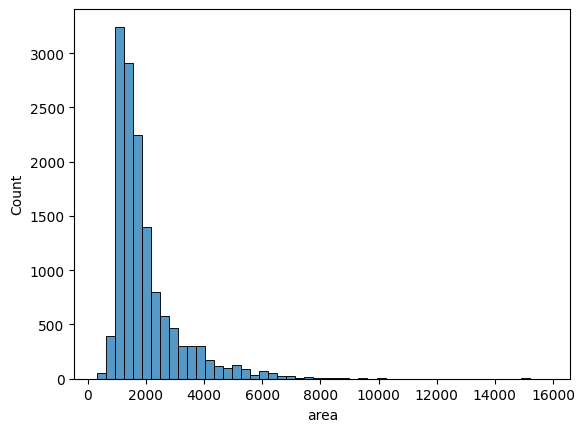

In [17]:
sns.histplot(df2['area'], bins=50)

#### outliers based on price_per_sqft column

<Axes: xlabel='price_per_sqft', ylabel='Count'>

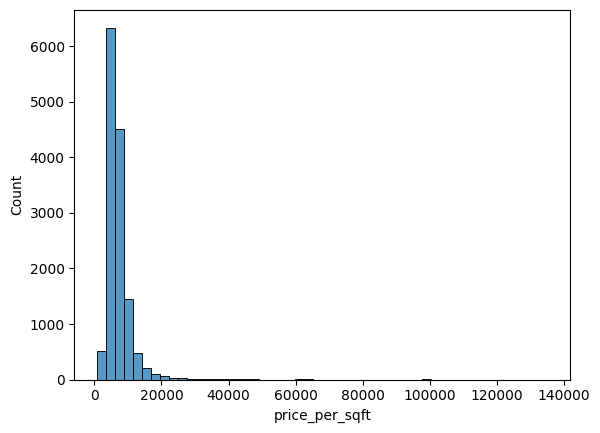

In [18]:
sns.histplot(df2['price_per_sqft'], bins=50)

<Axes: ylabel='price_per_sqft'>

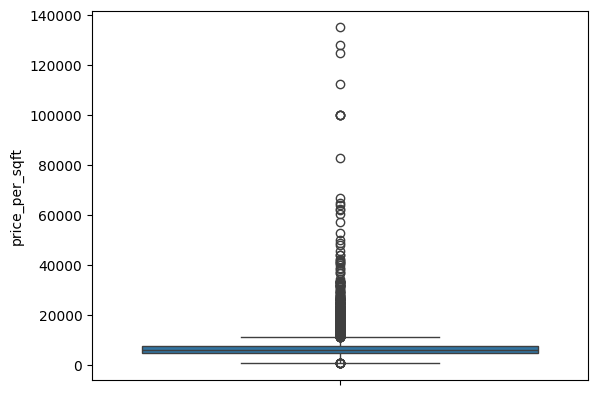

In [19]:
sns.boxplot(df2['price_per_sqft'])

##### Using IQR Method

In [20]:
# Calculate the IQR based on the 'price_per_sqft' column
Q1 = df2['price_per_sqft'].quantile(0.25)
Q3 = df2['price_per_sqft'].quantile(0.75)

IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(1092.0), np.float64(11508.0))

In [21]:
# Identify outliers
sqft_outliers = df2[(df2['price_per_sqft'] < lower_bound) | (df2['price_per_sqft'] > upper_bound)]

num_outliers = sqft_outliers.shape[0]
outliers_sqft_stats = sqft_outliers['price_per_sqft'].describe()

print(num_outliers)
outliers_sqft_stats

997


count      997.00
mean     17323.07
std      11413.85
min        787.00
25%      12671.00
50%      14230.00
75%      18000.00
max     135135.00
Name: price_per_sqft, dtype: float64

In [22]:
sqft_outliers.sort_values('price_per_sqft', ascending=False).head(20)[['area','locality','price_in_crore','price_per_sqft']]

,area,locality,price_in_crore,price_per_sqft
13657,777.00,Jubilee Hills,10.50,135135.00
6044,1250.00,Ameenpur,16.00,128000.00
6716,3999.00,Puppalaguda,49.88,124752.00
15134,1467.00,Ameenpur,16.50,112474.00
7150,1800.00,Mahendra Hills,18.00,100000.00
5699,1500.00,Osman Nagar,15.00,100000.00
1265,1500.00,Osman Nagar,15.00,100000.00
9515,777.00,Nanakramguda,7.77,100000.00
16028,1550.00,Gachibowli,12.82,82741.00
14888,2072.00,Yapral,13.90,67084.00


##### Using quantile method

In [23]:
lower_threshold = df2['price_per_sqft'].quantile(0.001)
upper_threshold = df2['price_per_sqft'].quantile(0.999)

lower_threshold, upper_threshold

(np.float64(1158.344), np.float64(60733.53900000404))

In [24]:
print(df2[(df2['price_per_sqft'] < lower_threshold) | (df2['price_per_sqft'] > upper_threshold)].shape)
df2[(df2['price_per_sqft'] < lower_threshold) | (df2['price_per_sqft'] > upper_threshold)]

(28, 25)


,property_type,bhk,area,society_name,locality,city,price_in_crore,price_per_sqft,status,new_resale,price_negotiable,age_of_property,bathrooms,carpet_area,floor,booking_amount,balconies,additional_rooms,security_deposit,furnishing_type,facing,overlooking,ownership_type,amenities,furnish_details
118,Independent House,4,2000.00,NaN,Safilguda,Hyderabad,13.00,65000.00,Ready to move,Resale,No,Unknown,4.00,1800.00,NaN,NaN,NaN,NaN,No Deposit,Unfurnished,South,NaN,NaN,NaN,NaN
771,Villa,4,4000.00,Haris Affluence,Lb Nagar,Hyderabad,0.35,865.00,NaN,New,Yes,Unknown,4.00,NaN,NaN,91000.00,NaN,NaN,No Deposit,Unfurnished,East,"Road View, Pool View, Garden View",Freehold,"Swimming Pool, Landscaped Gardens, Multipurpos...",NaN
1265,Villa,5,1500.00,NaN,Osman Nagar,Hyderabad,15.00,100000.00,Under Construction,Resale,Yes,Unknown,5.00,NaN,NaN,1000000.00,1.00,pooja room,No Deposit,Unfurnished,East,Garden View,Freehold,"Landscaped Gardens, Lift(s), Swimming Pool, Gy...",Sofa
1375,Apartment,3,1660.00,Vertex Pride,Kukatpally,Hyderabad,0.16,986.00,Ready to move,Resale,Yes,Old Property,3.00,NaN,NaN,67000.00,NaN,"study room, pooja room",No Deposit,Unfurnished,NaN,"Corner, Garden View, Pool View, Road View",Freehold,"Intercom, Full Power Backup, Childrens play ar...","Gas connection, Dining Table, Microwave, Sofa,..."
2000,Apartment,2,1080.00,NaN,Upperpally,Hyderabad,0.09,787.00,Ready to move,Resale,No,New Property,2.00,NaN,NaN,NaN,NaN,NaN,No Deposit,Furnished,NaN,NaN,NaN,NaN,NaN
2565,Apartment,3,1685.00,Sai Lr East Oak,Pocharam,Hyderabad,0.17,985.00,Ready to move,Resale,Yes,Moderately New Property,3.00,NaN,NaN,52000.00,NaN,NaN,No Deposit,Unfurnished,NaN,"Corner, Garden View, Pool View, Road View",Freehold,"Multipurpose Room, Intercom, Jogging Track, In...","Gas connection, Dining Table, Microwave, Wifi,..."
3519,Villa,5,4500.00,NaN,Kongara,Hyderabad,28.00,62222.00,Under Construction,New,No,Unknown,4.00,300.00,NaN,NaN,NaN,NaN,No Deposit,Unfurnished,East,NaN,NaN,"Gymnasium, Lift(s), Intercom, Sports Facility,...",NaN
4228,Apartment,2,1520.00,Hy End Homes,Madhapur,Hyderabad,0.17,1108.00,Ready to move,Resale,Yes,Unknown,3.00,NaN,NaN,71000.00,NaN,"study room, servant room, pooja room",No Deposit,Unfurnished,NaN,"Corner, Garden View, Pool View, Road View",Freehold,NaN,"Gas connection, Dining Table, Microwave, Wifi,..."
4769,Independent House,2,1250.00,NaN,Muthangi,Hyderabad,8.00,64000.00,Ready to move,New,Yes,New Property,3.00,NaN,NaN,50000.00,1.00,pooja room,No Deposit,Unfurnished,North,NaN,Freehold,NaN,NaN
5250,Apartment,3,1360.00,R Square Prasoona,Nagole,Hyderabad,0.14,997.00,Ready to move,Resale,Yes,Old Property,3.00,NaN,NaN,64000.00,1.00,NaN,No Deposit,Unfurnished,NaN,"Corner, Garden View, Pool View, Road View",Freehold,"Swimming Pool, Landscaped Gardens, Rain Water ...",NaN


##### IQR Method:
- Approach: Identifies outliers using the first (Q1) and third (Q3) quartiles, calculating boundaries as Q1-1.5×IQR and Q3+1.5×IQR.
- Limitation: Can be too restrictive, potentially removing legitimate high-value properties in datasets with high variability.
In this case, the lower limit is 1092 and upper limit is 11508.
##### Quantile-Based Outlier Removal:
- Approach: Defines thresholds using specific quantiles (e.g., 0.001 and 0.999), allowing for a more flexible, data-driven identification of outliers.
- Advantage: Better accommodates high-value properties and reflects the actual distribution of the data, preserving relevant entries.
##### Conclusion: Best Choice
- Quantile-Based Outlier Removal is preferred for the dataset, as it effectively retains legitimate high-value properties while adapting to the skewed distribution typical in real estate markets.

In [25]:
df3 = df2[(df2['price_per_sqft'] >= lower_threshold) & (df2['price_per_sqft'] <= upper_threshold)]
df3.shape

(13766, 25)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

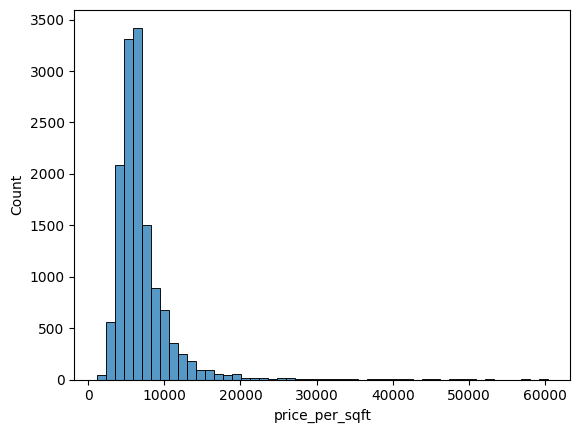

In [26]:
sns.histplot(df3['price_per_sqft'], bins=50)

#### outliers removal using price_in_crore column

<Axes: xlabel='price_in_crore', ylabel='Count'>

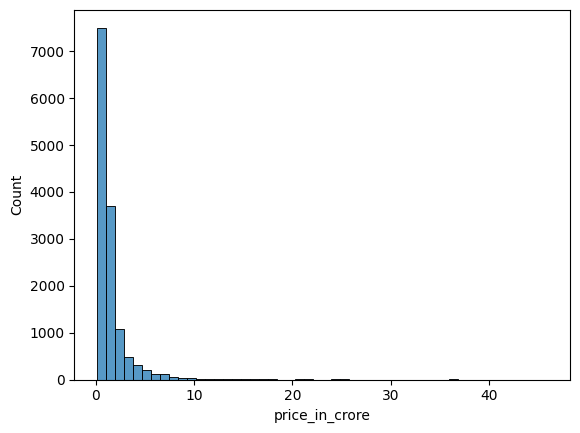

In [27]:
sns.histplot(df3['price_in_crore'], bins=50)

<Axes: ylabel='price_in_crore'>

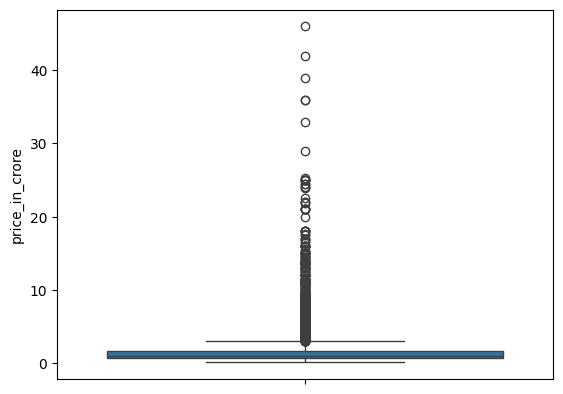

In [28]:
sns.boxplot(df3['price_in_crore'])

##### Using IQR Method

In [29]:
# Calculate the IQR based on the 'price_in_crore' column
Q1 = df3['price_in_crore'].quantile(0.25)
Q3 = df3['price_in_crore'].quantile(0.75)

IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(-0.7400000000000001), np.float64(3.0200000000000005))

In [30]:
# Identify outliers
price_outliers = df3[(df3['price_in_crore'] < lower_bound) | (df3['price_in_crore'] > upper_bound)]

num_outliers = price_outliers.shape[0]
outliers_price_stats = price_outliers['price_in_crore'].describe()

print(num_outliers)
outliers_price_stats

1335


count   1335.00
mean       6.13
std        4.23
min        3.03
25%        3.79
50%        4.80
75%        6.75
max       46.00
Name: price_in_crore, dtype: float64

In [31]:
price_outliers.sort_values('price_in_crore', ascending=False).sample(20)[['area','locality','price_in_crore','price_per_sqft']]

,area,locality,price_in_crore,price_per_sqft
1454,3700.00,Tellapur,6.40,17297.00
6460,2350.00,West Marredpally,4.25,18085.00
4354,3200.00,Basheer Bagh,4.00,12500.00
9376,4200.00,Nizampet,4.25,10119.00
13005,3925.00,Nallagandla Gachibowli,5.10,13000.00
1481,4000.00,Narsingi,10.00,25000.00
9753,3223.00,Tellapur,5.95,18461.00
5987,4500.00,Sainikpuri,4.05,9000.00
4885,6836.00,Kokapet,10.93,16000.00
6110,2500.00,Habsiguda,3.30,13200.00


##### Using Quantile Method

In [32]:
lower_threshold = df3['price_in_crore'].quantile(0.01)
upper_threshold = df3['price_in_crore'].quantile(0.999)

lower_threshold, upper_threshold

(np.float64(0.3), np.float64(24.454100000000146))

In [33]:
df3[(df3['price_in_crore'] < lower_threshold)][['area','locality','price_in_crore','price_per_sqft']].sample(10)

,area,locality,price_in_crore,price_per_sqft
9650,900.00,Shaheen Nagar,0.17,1888.00
17157,1200.00,Bhel,0.28,2333.00
6129,830.00,Ashok Nagar,0.24,2916.00
14944,680.00,Adibatla,0.26,3823.00
14069,650.00,Ashok Nagar,0.19,2953.00
6294,758.00,Huda Layout,0.26,3387.00
8952,620.00,Kothapet,0.25,4032.00
3124,920.00,Isnapur,0.20,2173.00
6875,950.00,Bapu Nagar,0.28,2947.00
2891,785.00,Tarnaka,0.28,3508.00


In [34]:
df3[df3['price_in_crore'] > upper_threshold][['area','locality','price_in_crore','price_per_sqft']]

,area,locality,price_in_crore,price_per_sqft
2196,9400.00,Jubilee Hills,39.00,41489.00
2848,7500.00,Gandipet,29.00,38666.00
3468,10000.00,Jubilee Hills,42.00,42000.00
4631,7500.00,Gandipet,25.00,33333.00
7725,7500.00,Gandipet,24.50,32666.00
12495,7500.00,Jubilee Hills,36.00,48000.00
15053,7500.00,Jubilee Hills,33.00,44000.00
15427,5100.00,Nanakramguda,25.00,49019.00
16129,12500.00,Jubilee Hills,46.00,36800.00
16321,8500.00,Jubilee Hills,36.00,42352.00


##### Quantile-Based Outlier Removal for price_in_crore

- Using the quantile-based approach, the calculated thresholds for the price_in_crore column are:
    -  Lower Threshold: 0.3
    -  Upper Threshold: 24.45
- While the lower threshold effectively captures extreme low values as outliers, the upper threshold is overly restrictive and captures high-value properties that are legitimate and necessary for your model.
- Removing these high-value properties could lead to a skewed dataset, affecting the model's ability to predict prices and understand market dynamics accurately.

In [35]:
df4 = df3[(df3['price_in_crore'] > lower_threshold)]
df4.shape

(13619, 25)

In [36]:
df4['price_in_crore'].describe()

count   13619.00
mean        1.58
std         2.08
min         0.31
25%         0.68
50%         0.97
75%         1.63
max        46.00
Name: price_in_crore, dtype: float64

#### outliers based on bedroom column

<Axes: xlabel='bhk', ylabel='Density'>

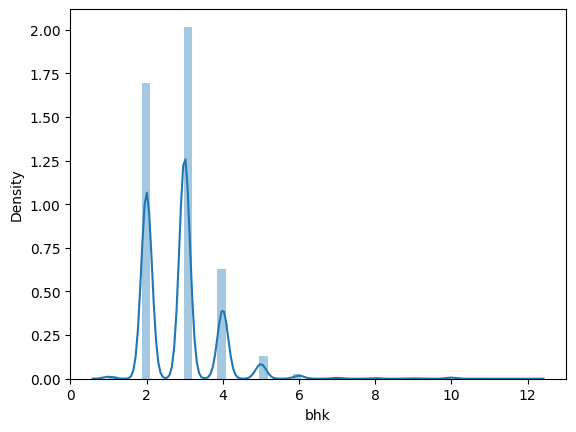

In [37]:
sns.distplot(df4['bhk'])

<Axes: ylabel='bhk'>

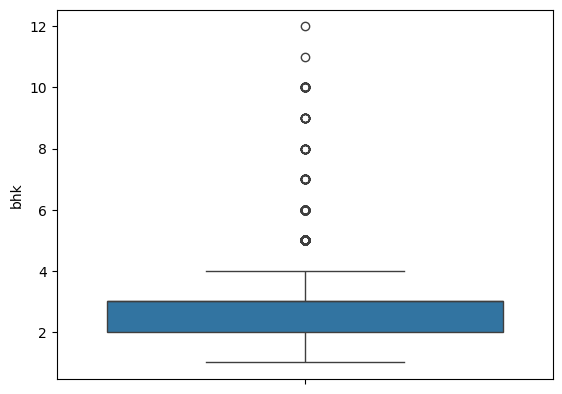

In [38]:
sns.boxplot(df4['bhk'])

In [39]:
df4['bhk'].describe()

count   13619.00
mean        2.87
std         0.94
min         1.00
25%         2.00
50%         3.00
75%         3.00
max        12.00
Name: bhk, dtype: float64

In [40]:
df4[df4['bhk'] >= 10]

,property_type,bhk,area,society_name,locality,city,price_in_crore,price_per_sqft,status,new_resale,price_negotiable,age_of_property,bathrooms,carpet_area,floor,booking_amount,balconies,additional_rooms,security_deposit,furnishing_type,facing,overlooking,ownership_type,amenities,furnish_details
2,Independent House,10,14400.00,NaN,Banjara Hills,Hyderabad,17.47,12131.00,Ready to move,Resale,No,Unknown,11.00,14400.00,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,North,NaN,NaN,NaN,NaN
29,Independent House,10,7250.00,NaN,Malkajgiri,Hyderabad,3.30,4551.00,Ready to move,Resale,No,Unknown,1.00,7150.00,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,NorthEast,NaN,NaN,Lift(s),NaN
1058,Independent House,10,9000.00,NaN,Gachibowli,Hyderabad,5.90,6555.00,Ready to move,Resale,No,Unknown,10.00,8900.00,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,NaN,NaN,NaN,NaN,NaN
1206,Independent House,10,5000.00,NaN,Kapra,Hyderabad,3.50,7000.00,Ready to move,Resale,No,Unknown,10.00,NaN,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,East,NaN,NaN,NaN,NaN
1267,Independent House,10,10000.00,NaN,Tarnaka,Hyderabad,6.00,6000.00,Ready to move,Resale,No,Unknown,8.00,10000.00,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,East,NaN,NaN,NaN,"TV, AC"
1317,Independent House,10,9000.00,NaN,Gachibowli,Hyderabad,5.90,6555.00,Ready to move,Resale,No,Unknown,9.00,NaN,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,South,NaN,NaN,Lift(s),NaN
1578,Independent House,10,8000.00,NaN,Padmarao Nagar,Hyderabad,5.00,6250.00,Ready to move,Resale,No,Unknown,10.00,8000.00,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,West,NaN,NaN,NaN,NaN
2997,Independent House,10,7600.00,NaN,Habsiguda,Hyderabad,8.00,10526.00,Ready to move,Resale,No,Unknown,6.00,6000.00,NaN,NaN,NaN,NaN,No Deposit,Furnished,West,NaN,NaN,NaN,NaN
3130,Independent House,12,10000.00,NaN,Hayathnagar,Hyderabad,3.70,3700.00,Ready to move,Resale,Yes,New Property,12.00,9200.00,NaN,370000.00,4.00,"study room, servant room, pooja room",No Deposit,Unfurnished,NaN,NaN,NaN,NaN,NaN
3704,Independent House,10,12000.00,NaN,Nallakunta,Hyderabad,7.75,6462.00,Ready to move,Resale,No,Unknown,10.00,11500.00,NaN,NaN,NaN,NaN,No Deposit,Unfurnished,East,NaN,NaN,NaN,NaN


- We have removed properties with BHK values greater than 10, as these properties represent outliers in the typical residential market. Such configurations are rare and belong to the ultra-luxury segment, which may not be relevant to our target market or the scope of our analysis. Excluding these outliers helps focus on more common residential properties, ensuring that the model better captures the trends and patterns applicable to the majority of the dataset.
- This approach ensures your model is focused on realistic, mainstream residential properties.

In [41]:
df5 = df4[df4['bhk'] <= 10]
df5['bhk'].describe()

count   13617.00
mean        2.86
std         0.93
min         1.00
25%         2.00
50%         3.00
75%         3.00
max        10.00
Name: bhk, dtype: float64

#### outliers based on bathroom column

<Axes: xlabel='bathrooms', ylabel='Density'>

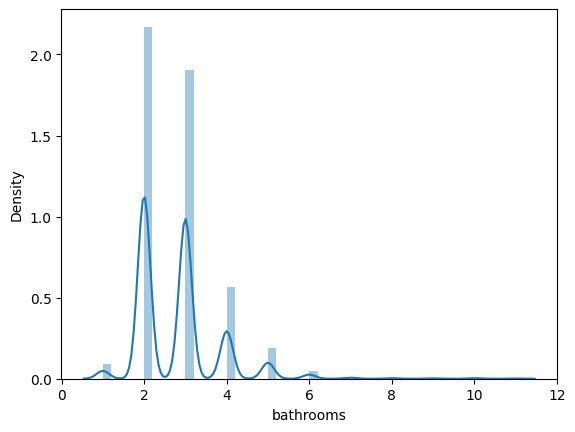

In [42]:
sns.distplot(df5['bathrooms'])

<Axes: ylabel='bathrooms'>

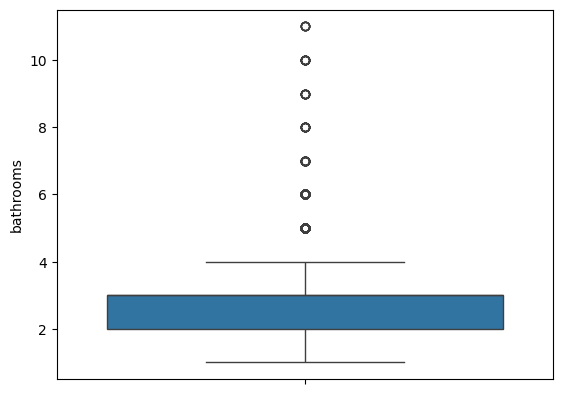

In [43]:
sns.boxplot(df5['bathrooms'])

In [44]:
df5['bathrooms'].describe()

count   11868.00
mean        2.78
std         1.00
min         1.00
25%         2.00
50%         3.00
75%         3.00
max        11.00
Name: bathrooms, dtype: float64

In [45]:
df5[df5['bathrooms'] >= 10]

,property_type,bhk,area,society_name,locality,city,price_in_crore,price_per_sqft,status,new_resale,price_negotiable,age_of_property,bathrooms,carpet_area,floor,booking_amount,balconies,additional_rooms,security_deposit,furnishing_type,facing,overlooking,ownership_type,amenities,furnish_details
2,Independent House,10,14400.00,NaN,Banjara Hills,Hyderabad,17.47,12131.00,Ready to move,Resale,No,Unknown,11.00,14400.00,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,North,NaN,NaN,NaN,NaN
1058,Independent House,10,9000.00,NaN,Gachibowli,Hyderabad,5.90,6555.00,Ready to move,Resale,No,Unknown,10.00,8900.00,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,NaN,NaN,NaN,NaN,NaN
1206,Independent House,10,5000.00,NaN,Kapra,Hyderabad,3.50,7000.00,Ready to move,Resale,No,Unknown,10.00,NaN,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,East,NaN,NaN,NaN,NaN
1578,Independent House,10,8000.00,NaN,Padmarao Nagar,Hyderabad,5.00,6250.00,Ready to move,Resale,No,Unknown,10.00,8000.00,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,West,NaN,NaN,NaN,NaN
3704,Independent House,10,12000.00,NaN,Nallakunta,Hyderabad,7.75,6462.00,Ready to move,Resale,No,Unknown,10.00,11500.00,NaN,NaN,NaN,NaN,No Deposit,Unfurnished,East,NaN,NaN,NaN,NaN
4876,Independent House,10,6500.00,NaN,Miyapur,Hyderabad,2.50,3846.00,Ready to move,Resale,No,Unknown,11.00,NaN,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,East,NaN,NaN,NaN,NaN
5049,Independent House,10,9800.00,NaN,Bachupally,Hyderabad,5.50,5612.00,Ready to move,New,No,Unknown,11.00,NaN,NaN,NaN,NaN,NaN,No Deposit,Unfurnished,NaN,NaN,NaN,NaN,NaN
5100,Independent House,10,8470.00,NaN,Badangpet,Hyderabad,3.50,4132.00,Ready to move,Resale,No,Unknown,10.00,NaN,NaN,NaN,NaN,NaN,No Deposit,Unfurnished,NaN,NaN,NaN,NaN,NaN
7091,Independent House,9,4050.00,NaN,Amberpet,Hyderabad,2.50,6172.00,Ready to move,Resale,No,Unknown,10.00,4000.00,NaN,NaN,NaN,NaN,No Deposit,Furnished,NorthWest,NaN,NaN,"Full Power Backup, Lift(s)","Washing Machine, BED, AC, Dining Table, Microw..."
7713,Independent House,9,4850.00,NaN,Kushaiguda,Hyderabad,3.24,6680.00,Ready to move,Resale,No,Moderately New Property,10.00,4500.00,NaN,NaN,NaN,NaN,No Deposit,Unfurnished,North,NaN,NaN,NaN,NaN


- We have properties with 10 bathrooms in the dataset, whose bhk is 10. As this configuration is typical in large or luxury homes where each bedroom often has an attached bathroom. In such properties, having one bathroom per bedroom is a standard feature, especially in high-end markets, making these entries relevant and valid for analysis.
- This ensures that relevant large properties are included without being mistakenly removed as outliers.

#### outliers bases on carpet_area column

In [46]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df5['carpet_area'].describe()

count      6119.00
mean       2100.83
std       28392.76
min          20.00
25%        1000.00
50%        1300.00
75%        1850.00
max     2200165.00
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Density'>

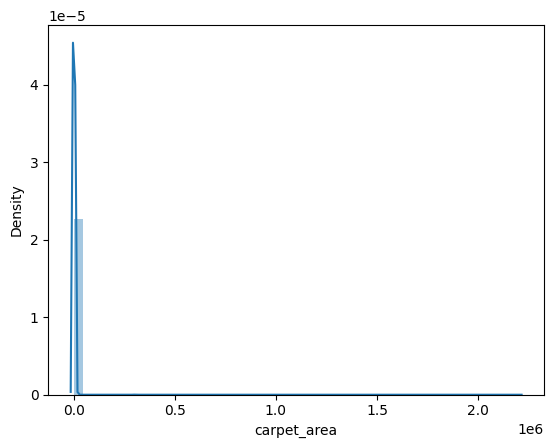

In [47]:
sns.distplot(df5['carpet_area'])

<Axes: ylabel='carpet_area'>

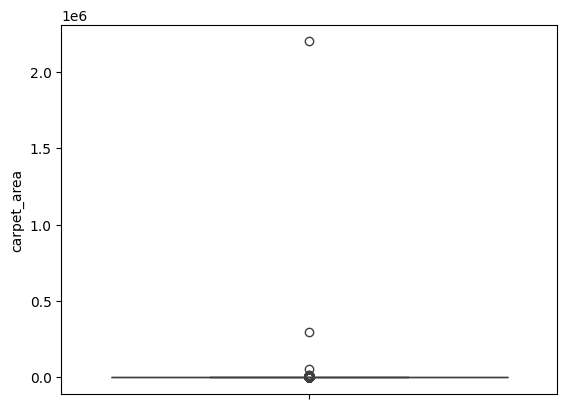

In [48]:
sns.boxplot(df5['carpet_area'])

In [49]:
df5[df5['carpet_area'] < 200][['area', 'carpet_area']]

,area,carpet_area
30,1580.00,60.00
923,1122.00,120.00
1127,1400.00,60.00
1308,2400.00,150.00
2136,2460.00,150.00
2786,1210.00,150.00
3277,924.00,176.00
3391,1300.00,100.00
3887,2200.00,150.00
4101,850.00,100.00


- This are clearly data errors. The property has 1580 sq.ft area but the carpet_area is 60 sq.ft which is impossible. and there are more data points like this.
- As per realestate guidelines, In most cases, the carpet area in your apartment is typically between 80% to 90% of its total built-up area.
- So, keeping this in mind we will fill the carpet_area column using area 

In [50]:
df5['carpet_ratio'] = df5['carpet_area'] / df5['area']
df5[~df5['carpet_area'].isnull()].head(5)[['area','carpet_area','carpet_ratio']]

,area,carpet_area,carpet_ratio
2,14400.00,14400.00,1.00
8,6500.00,6000.00,0.92
9,1840.00,1600.00,0.87
11,1500.00,1200.00,0.80
12,3955.00,3805.00,0.96


In [51]:
median_ratio = df5['carpet_ratio'].median()
median_ratio

np.float64(0.8870967741935484)

In [52]:
df5['carpet_area'] = round(df5['area'] * median_ratio,2)
df5['carpet_area'].describe()

count   13617.00
mean     1760.44
std      1068.77
min       279.44
25%      1091.13
50%      1419.35
75%      1979.11
max     14038.31
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Density'>

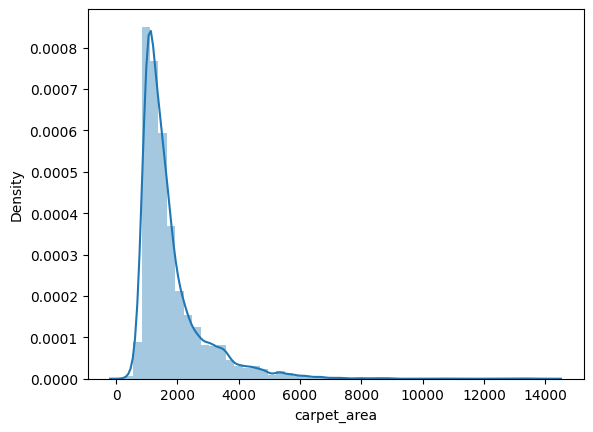

In [53]:
sns.distplot(df5['carpet_area'])

<Axes: ylabel='carpet_area'>

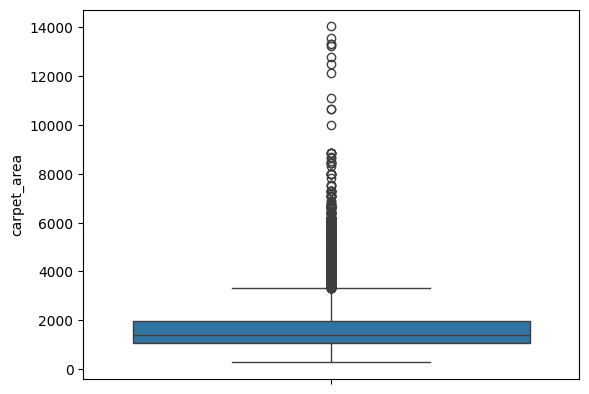

In [54]:
sns.boxplot(df5['carpet_area'])

In [55]:
df5.head(3)

,property_type,bhk,area,society_name,locality,city,price_in_crore,price_per_sqft,status,new_resale,price_negotiable,age_of_property,bathrooms,carpet_area,floor,booking_amount,balconies,additional_rooms,security_deposit,furnishing_type,facing,overlooking,ownership_type,amenities,furnish_details,carpet_ratio
0,Apartment,2,1120.00,NaN,Asmangarh,Hyderabad,0.58,5178.00,Ready to move,Resale,Yes,Old Property,2.00,993.55,4.00,500000.00,1.00,pooja room,No Deposit,Semi-Furnished,North,Road View,Freehold,"Landscaped Gardens, Lift(s), Swimming Pool, Gy...",Sofa,NaN
1,Apartment,3,1905.00,Asbl Asbl Spire,Kokapet,Hyderabad,1.39,7349.00,Under Construction,New,Yes,Unknown,3.00,1689.92,9.00,NaN,NaN,NaN,No Deposit,Unfurnished,NaN,NaN,Freehold,NaN,NaN,NaN
2,Independent House,10,14400.00,NaN,Banjara Hills,Hyderabad,17.47,12131.00,Ready to move,Resale,No,Unknown,11.00,12774.19,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,North,NaN,NaN,NaN,NaN,1.00


In [56]:
df5.shape

(13617, 26)

In [57]:
cols_to_drop = ['carpet_ratio']
df6 = df5.drop(cols_to_drop, axis='columns')
df6.head(3)

,property_type,bhk,area,society_name,locality,city,price_in_crore,price_per_sqft,status,new_resale,price_negotiable,age_of_property,bathrooms,carpet_area,floor,booking_amount,balconies,additional_rooms,security_deposit,furnishing_type,facing,overlooking,ownership_type,amenities,furnish_details
0,Apartment,2,1120.00,NaN,Asmangarh,Hyderabad,0.58,5178.00,Ready to move,Resale,Yes,Old Property,2.00,993.55,4.00,500000.00,1.00,pooja room,No Deposit,Semi-Furnished,North,Road View,Freehold,"Landscaped Gardens, Lift(s), Swimming Pool, Gy...",Sofa
1,Apartment,3,1905.00,Asbl Asbl Spire,Kokapet,Hyderabad,1.39,7349.00,Under Construction,New,Yes,Unknown,3.00,1689.92,9.00,NaN,NaN,NaN,No Deposit,Unfurnished,NaN,NaN,Freehold,NaN,NaN
2,Independent House,10,14400.00,NaN,Banjara Hills,Hyderabad,17.47,12131.00,Ready to move,Resale,No,Unknown,11.00,12774.19,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,North,NaN,NaN,NaN,NaN


#### Save this outlier treated df to csv file

In [58]:
df6.to_csv('data/cleaned_data/hyderabad/hyd_properties_outlier_treated.csv', index=False)